In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [82]:
n = 500
gender_data = []
income_data = []

In [83]:
for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    

In [84]:
Height = 160 + 15 * np.random.randn(n)
Weight = 60 + 10 * np.random.randn(n)
Age = 25 + 10 * np.random.randn(n)
Income = 1.8 + 5.0 * np.random.randn(n)

In [85]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic status': income_data,
    'Height': Height,
    'Weight': Weight,
    'Age': Age,
    'Income': Income
})

In [86]:
data.shape

(500, 6)

In [87]:
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Female,Rich,146.381792,54.343419,21.136254,1.578176
1,Male,Poor,145.159706,58.969226,17.458682,8.645696
2,Male,Middle Class,147.706943,78.466946,15.156350,-1.457485
3,Male,Poor,156.227643,31.795716,18.164277,0.032110
4,Male,Poor,168.879344,57.850988,39.529177,-3.463472


In [88]:
%matplotlib inline

(array([  6.,  26.,  46.,  96., 110., 109.,  69.,  26.,  10.,   2.]),
 array([-12.37024349,  -9.33329963,  -6.29635576,  -3.25941189,
         -0.22246803,   2.81447584,   5.85141971,   8.88836357,
         11.92530744,  14.96225131,  17.99919517]),
 <a list of 10 Patch objects>)

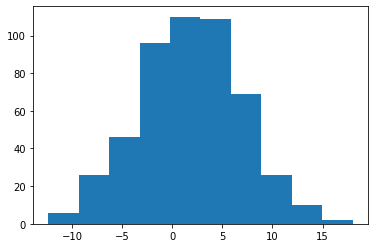

In [89]:
plt.hist(data['Income'])

(array([  6.,  26.,  46.,  96., 110., 109.,  69.,  26.,  10.,   2.]),
 array([-12.37024349,  -9.33329963,  -6.29635576,  -3.25941189,
         -0.22246803,   2.81447584,   5.85141971,   8.88836357,
         11.92530744,  14.96225131,  17.99919517]),
 <a list of 10 Patch objects>)

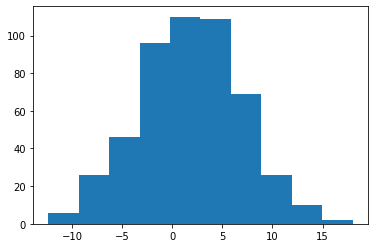

In [90]:
plt.hist(data['Income'])

In [91]:
data['Income'] = data['Income'].abs()
data['Age'] = data['Age'].abs()
data

,Gender,Economic status,Height,Weight,Age,Income
0,Female,Rich,146.381792,54.343419,21.136254,1.578176
1,Male,Poor,145.159706,58.969226,17.458682,8.645696
2,Male,Middle Class,147.706943,78.466946,15.156350,1.457485
3,Male,Poor,156.227643,31.795716,18.164277,0.032110
4,Male,Poor,168.879344,57.850988,39.529177,3.463472
...,...,...,...,...,...,...
495,Female,Poor,146.494750,53.802896,8.449343,8.316257
496,Female,Poor,144.072278,67.494059,11.889072,4.227464
497,Male,Poor,155.116566,63.071539,19.721842,3.389817
498,Male,Rich,184.899130,59.422793,18.845800,5.771874


In [92]:
data.describe()

,Height,Weight,Age,Income
count,500.000000,500.000000,500.000000,500.000000
mean,159.737793,59.755638,24.910945,4.312981
std,15.159244,10.299766,10.034746,3.230855
min,113.539250,31.795716,0.760344,0.005773
25%,148.789513,52.836239,17.528579,1.823174
50%,159.721001,59.567380,25.231068,3.718930
75%,169.918336,66.483370,31.538718,6.203622
max,217.517577,93.500429,53.327507,17.999195


In [93]:
data['Age'] = data['Age'].round()
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Female,Rich,146.381792,54.343419,21.0,1.578176
1,Male,Poor,145.159706,58.969226,17.0,8.645696
2,Male,Middle Class,147.706943,78.466946,15.0,1.457485
3,Male,Poor,156.227643,31.795716,18.0,0.032110
4,Male,Poor,168.879344,57.850988,40.0,3.463472


In [94]:
data.loc[(data['Age']<61),'Buckets'] = '41-60'
data.loc[(data['Age']<41.0),'Buckets'] = '21-40'
data.loc[(data['Age']<21.0),'Buckets'] = '0-20'

In [95]:
data.head(200)

,Gender,Economic status,Height,Weight,Age,Income,Buckets
0,Female,Rich,146.381792,54.343419,21.0,1.578176,21-40
1,Male,Poor,145.159706,58.969226,17.0,8.645696,0-20
2,Male,Middle Class,147.706943,78.466946,15.0,1.457485,0-20
3,Male,Poor,156.227643,31.795716,18.0,0.032110,0-20
4,Male,Poor,168.879344,57.850988,40.0,3.463472,21-40
...,...,...,...,...,...,...,...
195,Female,Rich,181.742440,38.892181,21.0,6.202787,21-40
196,Male,Rich,160.471427,54.388101,24.0,2.534003,21-40
197,Male,Rich,180.082503,61.950390,20.0,0.603990,0-20
198,Female,Poor,154.263005,61.687549,6.0,0.293336,0-20


In [96]:
data_group = data.groupby('Gender')
data_doublegroup = data.groupby(['Gender', 'Economic status'])
data_group_age = data.loc[(data['Economic status'] == 'Rich')]

In [97]:
for names, groups in data_group:
    print(names)
    print(groups)

Female
     Gender Economic status      Height     Weight   Age     Income Buckets
0    Female            Rich  146.381792  54.343419  21.0   1.578176   21-40
6    Female            Rich  159.143132  43.888899  10.0   0.967412    0-20
7    Female            Rich  169.465517  37.118932  26.0   0.518291   21-40
9    Female            Poor  155.035743  47.189475  28.0   8.199949   21-40
12   Female            Poor  147.680037  48.921128  17.0   0.055879    0-20
..      ...             ...         ...        ...   ...        ...     ...
488  Female            Rich  151.092690  59.518763  18.0   9.702944    0-20
491  Female    Middle Class  164.947885  41.615666  17.0   3.281217    0-20
495  Female            Poor  146.494750  53.802896   8.0   8.316257    0-20
496  Female            Poor  144.072278  67.494059  12.0   4.227464    0-20
499  Female            Poor  165.817650  54.405140  28.0  14.136361   21-40

[254 rows x 7 columns]
Male
    Gender Economic status      Height     Weight   

In [98]:
for names, group in data_doublegroup:
    print (names)
    print (group)

('Female', 'Middle Class')
     Gender Economic status      Height     Weight   Age    Income Buckets
13   Female    Middle Class  165.602756  66.848579   9.0  4.058918    0-20
16   Female    Middle Class  161.107508  65.175024  22.0  3.931215   21-40
20   Female    Middle Class  126.162841  52.993886  20.0  8.799528    0-20
28   Female    Middle Class  181.014035  65.482902  19.0  8.147825    0-20
36   Female    Middle Class  148.869455  65.751868  16.0  8.129087    0-20
..      ...             ...         ...        ...   ...       ...     ...
475  Female    Middle Class  158.376210  46.805758  35.0  0.466304   21-40
478  Female    Middle Class  173.322861  59.249171  24.0  2.413193   21-40
483  Female    Middle Class  163.330010  73.367752  38.0  1.876820   21-40
484  Female    Middle Class  149.670114  43.571099  30.0  3.169915   21-40
491  Female    Middle Class  164.947885  41.615666  17.0  3.281217    0-20

[98 rows x 7 columns]
('Female', 'Poor')
     Gender Economic status    

In [99]:
data_group_age.head()

,Gender,Economic status,Height,Weight,Age,Income,Buckets
0,Female,Rich,146.381792,54.343419,21.0,1.578176,21-40
6,Female,Rich,159.143132,43.888899,10.0,0.967412,0-20
7,Female,Rich,169.465517,37.118932,26.0,0.518291,21-40
11,Male,Rich,135.831250,58.149202,16.0,4.592477,0-20
21,Female,Rich,162.055196,68.363734,20.0,1.410204,0-20


In [100]:
data_group_age.describe()

,Height,Weight,Age,Income
count,151.000000,151.000000,151.000000,151.000000
mean,159.874416,59.671232,25.284768,4.270097
std,15.830401,10.521879,10.028877,3.137326
min,127.724220,32.387432,2.000000,0.015521
25%,147.819813,52.858736,18.000000,1.771195
50%,159.143132,59.422793,27.000000,3.875626
75%,169.644829,66.407203,31.000000,5.999377
max,217.517577,93.500429,49.000000,14.093414


In [ ]:
# the mean of rich people for this random data frame is 25.